数据加载成功！特征数据前5行：
   FlightNumber  PayloadMass  Flights  Block  ReusedCount  Orbit_ES-L1  \
0           1.0  6104.959412      1.0    1.0          0.0          0.0   
1           2.0   525.000000      1.0    1.0          0.0          0.0   
2           3.0   677.000000      1.0    1.0          0.0          0.0   
3           4.0   500.000000      1.0    1.0          0.0          0.0   
4           5.0  3170.000000      1.0    1.0          0.0          0.0   

   Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  ...  Serial_B1058  \
0        0.0        0.0        0.0        0.0  ...           0.0   
1        0.0        0.0        0.0        0.0  ...           0.0   
2        0.0        0.0        0.0        1.0  ...           0.0   
3        0.0        0.0        0.0        0.0  ...           0.0   
4        0.0        1.0        0.0        0.0  ...           0.0   

   Serial_B1059  Serial_B1060  Serial_B1062  GridFins_False  GridFins_True  \
0           0.0           0.0           0.0         

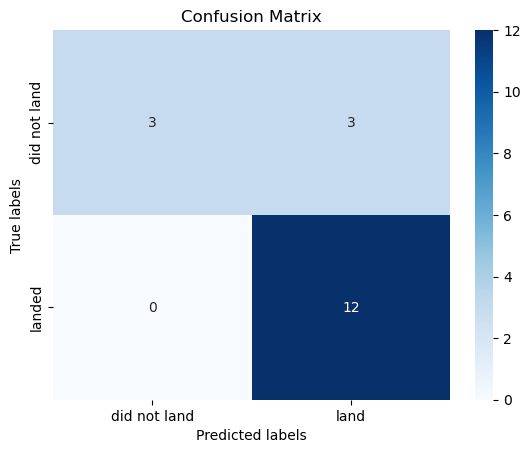


=== Task 6 结果 ===
SVM最佳超参数： {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
SVM交叉验证准确率： 0.8482

=== Task 7 结果 ===
SVM测试集准确率：0.8333
SVM混淆矩阵：


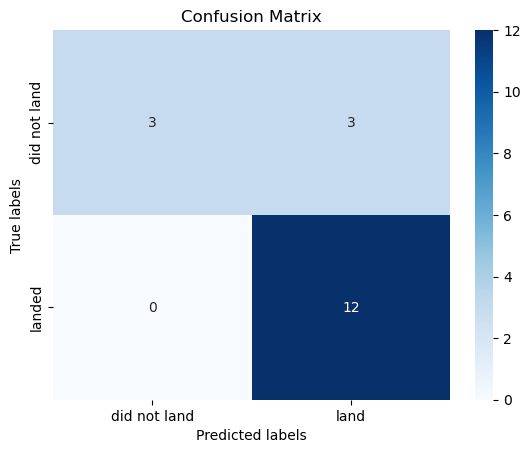

D:\Users\18398\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\18398\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\18398\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "D:\Users\18398\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\Users\18398\anaconda3\Lib\site-pac


=== Task 8 结果 ===
决策树最佳超参数： {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
决策树交叉验证准确率： 0.8732

=== Task 9 结果 ===
决策树测试集准确率：0.8333
决策树混淆矩阵：


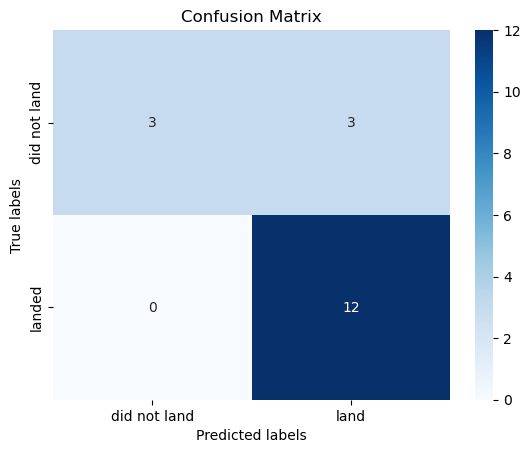


=== Task 10 结果 ===
KNN最佳超参数： {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
KNN交叉验证准确率： 0.8482

=== Task 11 结果 ===
KNN测试集准确率：0.8333
KNN混淆矩阵：


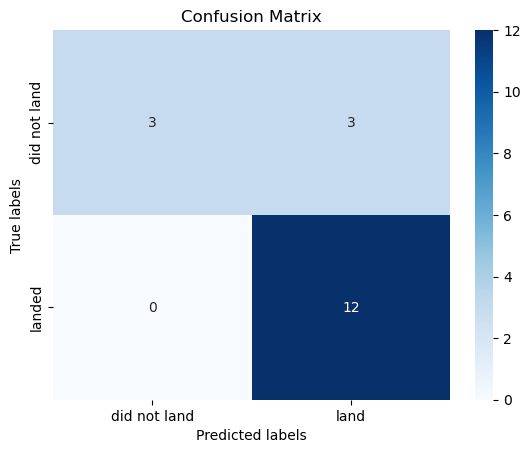


=== Task 12 结果 ===
所有模型测试集准确率汇总：
逻辑回归：0.8333
SVM：0.8333
决策树：0.8333
KNN：0.8333

最佳模型：逻辑回归，准确率：0.8333


In [1]:
# ===================== 本地环境依赖安装提示（新手必看） =====================
# 打开终端/命令提示符，执行以下命令安装所需库（只需运行一次）：
# pip install numpy pandas seaborn scikit-learn matplotlib

# 导入核心库（本地环境直接导入，无需await）
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# 定义混淆矩阵绘制函数（新手易懂版）
def plot_confusion_matrix(y,y_predict):
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, cmap='Blues'); # 标注单元格数值
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); 
    ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show()

# ===================== 加载数据集（本地环境直接用pandas读取远程CSV） =====================
# 加载标签数据（Class列：1=着陆成功，0=失败）
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(URL1)

# 加载特征数据
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
X = pd.read_csv(URL2)

# 查看数据基本信息（新手验证数据加载成功）
print("数据加载成功！特征数据前5行：")
print(X.head())
print("\n标签数据前5行：")
print(data[['Class']].head())

# ===================== TASK 1：创建标签数组Y =====================
# 从data的Class列生成numpy数组，赋值给Y（确保是Pandas Series）
Y = data['Class'].to_numpy()
# 验证Y的格式（新手检查）
print("\n=== Task 1 结果 ===")
print(f"Y的类型：{type(Y)}，形状：{Y.shape}")
print(f"Y前10个值：{Y[:10]}")

# ===================== TASK 2：标准化特征数据X =====================
# 使用StandardScaler标准化（让特征均值为0，方差为1）
transform = preprocessing.StandardScaler()
# 先拟合数据分布，再转换
X = transform.fit_transform(X)
# 转换为DataFrame方便查看（新手友好）
X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
print("\n=== Task 2 结果 ===")
print("标准化后的特征数据前5行：")
print(X.head())

# ===================== TASK 3：拆分训练集/测试集 =====================
# 拆分规则：测试集占20%，随机种子2（保证结果可复现）
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print("\n=== Task 3 结果 ===")
print(f"训练集特征形状：{X_train.shape}，训练集标签形状：{Y_train.shape}")
print(f"测试集特征形状：{X_test.shape}，测试集标签形状：{Y_test.shape}")
print(f"测试集样本数：{Y_test.shape[0]}")

# ===================== TASK 4：逻辑回归+网格搜索 =====================
# 定义参数网格
parameters ={'C':[0.01,0.1,1], 'penalty':['l2'], 'solver':['lbfgs']}
# 创建逻辑回归对象
lr = LogisticRegression()
# 创建GridSearchCV对象（10折交叉验证）
logreg_cv = GridSearchCV(lr, parameters, cv=10)
# 拟合训练数据
logreg_cv.fit(X_train, Y_train)
# 输出最佳参数和验证集准确率
print("\n=== Task 4 结果 ===")
print("逻辑回归最佳超参数：", logreg_cv.best_params_)
print("逻辑回归交叉验证准确率：", round(logreg_cv.best_score_, 4))

# ===================== TASK 5：逻辑回归测试集准确率 =====================
# 计算测试集准确率
logreg_test_acc = logreg_cv.score(X_test, Y_test)
print("\n=== Task 5 结果 ===")
print(f"逻辑回归测试集准确率：{round(logreg_test_acc, 4)}")
# 预测测试集并绘制混淆矩阵
yhat_logreg = logreg_cv.predict(X_test)
print("逻辑回归混淆矩阵：")
plot_confusion_matrix(Y_test, yhat_logreg)

# ===================== TASK 6：SVM+网格搜索 =====================
# 定义SVM参数网格
parameters_svm = {'kernel':('linear', 'rbf','poly','sigmoid'),
                  'C': np.logspace(-3, 3, 5),
                  'gamma':np.logspace(-3, 3, 5)}
# 创建SVM对象
svm = SVC()
# 创建GridSearchCV对象（10折交叉验证）
svm_cv = GridSearchCV(svm, parameters_svm, cv=10)
# 拟合训练数据
svm_cv.fit(X_train, Y_train)
# 输出最佳参数和验证集准确率
print("\n=== Task 6 结果 ===")
print("SVM最佳超参数：", svm_cv.best_params_)
print("SVM交叉验证准确率：", round(svm_cv.best_score_, 4))

# ===================== TASK 7：SVM测试集准确率 =====================
# 计算测试集准确率
svm_test_acc = svm_cv.score(X_test, Y_test)
print("\n=== Task 7 结果 ===")
print(f"SVM测试集准确率：{round(svm_test_acc, 4)}")
# 预测测试集并绘制混淆矩阵
yhat_svm = svm_cv.predict(X_test)
print("SVM混淆矩阵：")
plot_confusion_matrix(Y_test, yhat_svm)

# ===================== TASK 8：决策树+网格搜索 =====================
# 定义决策树参数网格
parameters_tree = {'criterion': ['gini', 'entropy'],
                   'splitter': ['best', 'random'],
                   'max_depth': [2*n for n in range(1,10)],
                   'max_features': ['auto', 'sqrt'],
                   'min_samples_leaf': [1, 2, 4],
                   'min_samples_split': [2, 5, 10]}
# 创建决策树对象
tree = DecisionTreeClassifier()
# 创建GridSearchCV对象（10折交叉验证）
tree_cv = GridSearchCV(tree, parameters_tree, cv=10)
# 拟合训练数据
tree_cv.fit(X_train, Y_train)
# 输出最佳参数和验证集准确率
print("\n=== Task 8 结果 ===")
print("决策树最佳超参数：", tree_cv.best_params_)
print("决策树交叉验证准确率：", round(tree_cv.best_score_, 4))

# ===================== TASK 9：决策树测试集准确率 =====================
# 计算测试集准确率
tree_test_acc = tree_cv.score(X_test, Y_test)
print("\n=== Task 9 结果 ===")
print(f"决策树测试集准确率：{round(tree_test_acc, 4)}")
# 预测测试集并绘制混淆矩阵
yhat_tree = tree_cv.predict(X_test)
print("决策树混淆矩阵：")
plot_confusion_matrix(Y_test, yhat_tree)

# ===================== TASK 10：KNN+网格搜索 =====================
# 定义KNN参数网格
parameters_knn = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'p': [1,2]}
# 创建KNN对象
KNN = KNeighborsClassifier()
# 创建GridSearchCV对象（10折交叉验证）
knn_cv = GridSearchCV(KNN, parameters_knn, cv=10)
# 拟合训练数据
knn_cv.fit(X_train, Y_train)
# 输出最佳参数和验证集准确率
print("\n=== Task 10 结果 ===")
print("KNN最佳超参数：", knn_cv.best_params_)
print("KNN交叉验证准确率：", round(knn_cv.best_score_, 4))

# ===================== TASK 11：KNN测试集准确率 =====================
# 计算测试集准确率
knn_test_acc = knn_cv.score(X_test, Y_test)
print("\n=== Task 11 结果 ===")
print(f"KNN测试集准确率：{round(knn_test_acc, 4)}")
# 预测测试集并绘制混淆矩阵
yhat_knn = knn_cv.predict(X_test)
print("KNN混淆矩阵：")
plot_confusion_matrix(Y_test, yhat_knn)

# ===================== TASK 12：找出最佳模型 =====================
# 汇总所有模型的测试集准确率
model_acc = {
    "逻辑回归": logreg_test_acc,
    "SVM": svm_test_acc,
    "决策树": tree_test_acc,
    "KNN": knn_test_acc
}
# 找出准确率最高的模型
best_model = max(model_acc, key=model_acc.get)
best_acc = model_acc[best_model]

print("\n=== Task 12 结果 ===")
print("所有模型测试集准确率汇总：")
for model, acc in model_acc.items():
    print(f"{model}：{round(acc, 4)}")
print(f"\n最佳模型：{best_model}，准确率：{round(best_acc, 4)}")

In [3]:
# 验证1：检查测试集样本数和预测结果差异
print("=== 验证：各模型预测结果是否真的完全一样 ===")
# 重新获取各模型的预测结果
yhat_logreg = logreg_cv.predict(X_test)
yhat_svm = svm_cv.predict(X_test)
yhat_tree = tree_cv.predict(X_test)
yhat_knn = knn_cv.predict(X_test)

# 打印各模型预测结果
print("逻辑回归预测结果：", yhat_logreg)
print("SVM预测结果：", yhat_svm)
print("决策树预测结果：", yhat_tree)
print("KNN预测结果：", yhat_knn)

# 统计各模型预测正确的数量
correct_logreg = sum(yhat_logreg == Y_test)
correct_svm = sum(yhat_svm == Y_test)
correct_tree = sum(yhat_tree == Y_test)
correct_knn = sum(yhat_knn == Y_test)

print("\n=== 验证：各模型正确预测数 ===")
print(f"逻辑回归正确数：{correct_logreg}/18")
print(f"SVM正确数：{correct_svm}/18")
print(f"决策树正确数：{correct_tree}/18")
print(f"KNN正确数：{correct_knn}/18")

# 验证2：检查GridSearchCV是否真的找到了不同的超参数
print("\n=== 验证：各模型最佳超参数是否不同 ===")
print("逻辑回归最佳参数：", logreg_cv.best_params_)
print("SVM最佳参数：", svm_cv.best_params_)
print("决策树最佳参数：", tree_cv.best_params_)
print("KNN最佳参数：", knn_cv.best_params_)

=== 验证：各模型预测结果是否真的完全一样 ===
逻辑回归预测结果： [1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1]
SVM预测结果： [1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1]
决策树预测结果： [1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1]
KNN预测结果： [1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1]

=== 验证：各模型正确预测数 ===
逻辑回归正确数：15/18
SVM正确数：15/18
决策树正确数：15/18
KNN正确数：15/18

=== 验证：各模型最佳超参数是否不同 ===
逻辑回归最佳参数： {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
SVM最佳参数： {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
决策树最佳参数： {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
KNN最佳参数： {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
